In [8]:
import csv

In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [11]:
from wordcloud import WordCloud

In [12]:
import requests

In [13]:
import re

In [14]:
import nltk

In [15]:
from nltk import word_tokenize

In [16]:
from nltk import sent_tokenize

In [17]:
from nltk.util import ngrams

In [18]:
from nltk.corpus import stopwords

In [19]:
#from requests_html import AsyncHTMLSession

In [20]:
from bs4 import BeautifulSoup as mysoup

Get the HTML using the Get request

In [21]:
#basickikuyu = 'https://glosbe.com/en/ki/Word'

I created a function scrapping html from web page based on the url which is the function param and remove the html tags, punctuations and whitespaces.
The function also tokenizes the text in URL and removes the stop words.

In [22]:
sw = set (stopwords.words('english'))

In [23]:
print(sw)

{'their', 'nor', 'some', 'these', 'herself', "doesn't", 'while', 'how', 'most', 'but', 'again', 'with', 'for', 'hadn', 'he', 'under', "weren't", "you'd", 'what', "hasn't", 'can', 'more', 're', 'itself', 'once', 'why', 'ma', 'here', 'in', 'at', 'shouldn', 'hasn', 'were', 'than', 'when', 's', 'do', 'any', 'yourselves', 'no', 'be', "wouldn't", "hadn't", 'her', 'are', 'of', "couldn't", 'will', 'only', 'o', 'further', 'over', 'his', 'been', 'its', 'weren', 'out', 'until', 'having', 'i', "don't", 'll', 'ain', 'our', 'being', 'just', "you'll", 'she', 'after', 'on', 'himself', "shouldn't", 'below', 'don', 'should', "mustn't", 'as', 'to', 'wasn', 'have', 'above', 'same', 'all', 'was', 'ourselves', 'm', "you're", 'who', 'had', 'because', 'up', 'did', 'there', 'other', 'very', 'them', "isn't", 'didn', "wasn't", 'we', 'a', 'not', 'needn', 'whom', 'against', 'it', 'is', 'aren', "aren't", "needn't", 'this', 'wouldn', 'ours', "it's", 'own', 'and', 'theirs', 't', 'does', 'during', 've', 'isn', 'has', 

In [24]:
def  get_html (url):
    gethtml = requests.get(url, headers = {'User-agent': 'Super Bot Power Level Over 9000'})
    nduatisoup = mysoup (gethtml.content, 'html.parser')
    var= nduatisoup.text
    #words = var.split(" ")
    #var1 = ""
    #punc = '''!()-[]{};:\,<>''/?@#$%^$* _ |""'''
    #for mylist in var:
        #if mylist in punc:
            #var1 = var.replace(mylist, " ")
    var1 = re.sub(r"[^\w\s]"," ", var) # remove punctuations
    var2 = re.sub(r"\s+","  ",var1) #remove whitespaces
    var3 = re.sub(r"\d", " ",var2)#remove digits
    #words = str(word_tokenize(var3))
    my_tokens = sent_tokenize(var3)
    without_sw = [word for word in my_tokens if not word in sw]
    
    strWithoutsw = ' '.join([str(wrd) for wrd in without_sw])
    #my_tokens = nltk.ngrams(words, 5)
   
    #return strWithoutsw
    return strWithoutsw.lower()
    

Srapping and cleanig using the previously defined function

In [25]:
#kikuyuwords = 'https://wisdomafrica.com/top-100-kikuyu-translations/'

In [26]:
#kikwords = get_html(kikuyuwords)

below code was a trial to get the notebook to scrap from web pages with JS but I commented it out and will use it later

'''async def get_kik():
    r = await session.get(kikuyuwords1)
    content = r.html.find('#lyra-wrapper')[0].text
    print(content)
async def get_kik1():
    r = await session.get(kikuyuwords)
    content = r.html.find('.entry-content')[0].text
    print(content)
async def get_kik2():
    r = await session.get(basickikuyu)
    content = r.html.find('.dictionary-grid')[0].text
    print(content)'''


Scrapping and cleaning  a second web page .

In [27]:
#kikdict = get_html(basickikuyu)

Scrapping and cleaning a third webpage

In [28]:
nationblog = "https://nation.africa/kenya/sports/athletics/relief-as-eldoret-city-marathon-winners-get-prize-money-4153806"

In [29]:
nation = get_html(nationblog)

I will now open the file I want to save all the scrapped data from the three sources for labelling purposes.

next I define a function to write to a txt file.

In [20]:
def write_fl(content):
    file = open('C:/Users/user/Desktop/english1.txt','w',encoding = "utf8")
    words = content.split(".")
    #my_tokens = nltk.ngrams(words, 3)
    #strtkn = ''.join([str(wrd) for wrd in my_tokens])
    with file as fl:
        for line in words:
            fl.write(line)
            fl.write('\n')
    
            
        
    
    

Writing all the scrapped web pages to the txt file.

In [39]:
content =nation+"\n"*4+hist+"\n"*4+bib+"\n"*4+bus+"\n"*4+sprt

In [ ]:
write_fl(content)

In [31]:
history = "https://www.discoverwalks.com/blog/nairobi/5-important-facts-about-the-history-of-kenya/"

In [32]:
hist=get_html(history)

In [33]:
bible = "https://www.thegospelcoalition.org/article/why-study-the-prophets/"

In [34]:
bib = get_html(bible)

In [35]:
business = "https://www.standardmedia.co.ke/opinion/article/2001384676/the-emerging-power-of-youth-business-in-kenya"

In [36]:
bus = get_html(business)

In [37]:
sport = "https://edition.cnn.com/2023/03/22/football/mesut-ozil-retirement-football-spt-intl"

In [38]:
sprt = get_html(sport)

Next I'll visualize the data for the sampled scrapped websites in a wordcloud.

In [40]:
#Below code generates the word cloud with the desired characteristics.
mywordcloud = WordCloud(
width = 500,
height = 500,

background_color = '#33ff33',
    colormap = "Pastel1",
    random_state=10,
    collocations=False,

).generate(content)

In [41]:
def plot_cloud(mywordcloud):
    #sets the figure size
    plt.figure(figsize=(10,20))
    #Displays the image
    plt.imshow(mywordcloud)
    #Declares the 'No Axis Details'
    plt.axis("off")

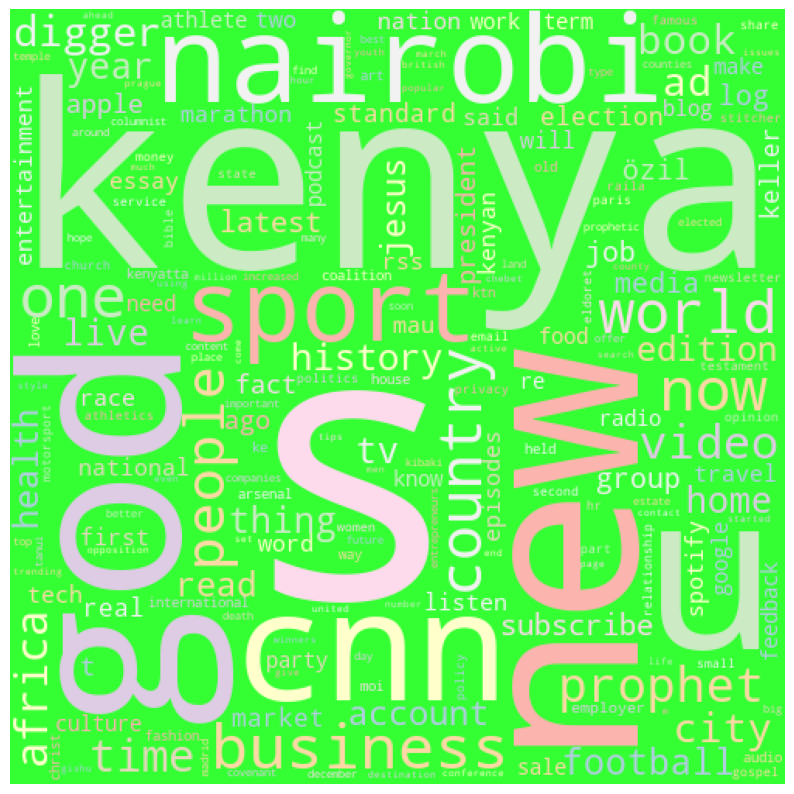

In [42]:
plot_cloud(mywordcloud)

The next step is the scrapped data labelling and further text preprocessing will be achieved when loading the labelled data for trainning of the model to minimize the noise as much as possible.The above scrapping is only ,eant for the milestone but for the data labelling I'll scrap a few more webpages since I'm doing  a machine translation.